# A. Importing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scipyio
import seaborn as sns
import pandas as pd
from google.colab import drive
import os

# B. Reading Dataset

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
filepath = "gdrive/My Drive/Forearm Invariant Data/"

In [4]:
gestures_label = {
	 'Thumb_UP' : 0,
	 'Index' : 1,
	 'Right_Angle' : 2,
	 'Peace' : 3,
	 'Index_Little' : 4,
	 'Thumb_Little' : 5,
	 'Hand_Close' : 6,
	 'Hand_Open' : 7,
	 'Wrist_Extension' : 8,
	 'Wrist_Flexion' : 9,
	 'Ulner_Deviation' : 10,
	 'Radial_Deviation' : 11
}

gestures = ['Thumb_UP', 'Index_Little', 'Right_Angle', 'Peace', 'Index', 'Thumb_Little', 'Hand_Close', 'Hand_Open',
	 'Wrist_Extension', 'Wrist_Flexion', 'Ulner_Deviation', 'Radial_Deviation'
]

In [5]:
persons = ["Arifa", "Arnob", "Ashis", "Bayezid", "Bushra", "Choity", "Choity_new", "Eftekhar",
           "Fahim", "Humaid", "Humayun", "Johir", "Joy", "Mamun", "Noman", "Piyus", "Sazzad",
           "Safi", "Shourav", "Tamim", "Wadud"]

In [6]:
def get_gesture_label(filename, gestures, gestures_label):
  for gesture in gestures:
    if(filename.find(gesture)!=-1):
      #print(filename, gesture, gestures_label[gesture])
      return gestures_label[gesture]

In [7]:
def read_dataset(root_datapath, persons, orientation):
  x = []
  y = []
  for person in persons:
    person_folder_path = root_datapath + "/" + person + "/" + orientation
    for root, dirs, files in os.walk(person_folder_path, topdown=False):
      for file in files:
        if file.find('Copy')!=-1:
          continue
        else:
          matdata = scipyio.loadmat(os.path.join(person_folder_path, file))
          x.append(matdata['value'])
          #print(file, get_gesture_label(file, gestures, gestures_label))
          y.append(get_gesture_label(file, gestures, gestures_label))

  x = np.array(x)
  y = np.array(y)
  return x, y

In [8]:
rest_x, rest_y = read_dataset(filepath, persons, "Rest")
pronation_x, pronation_y = read_dataset(filepath, persons, "Pronation")
supination_x, supination_y = read_dataset(filepath, persons, "Supination")

In [9]:
print(rest_x.shape, rest_y.shape)
print(supination_x.shape, supination_y.shape)
print(pronation_x.shape, pronation_y.shape)

(1020, 8, 8000) (1020,)
(1020, 8, 8000) (1020,)
(1032, 8, 8000) (1032,)


In [11]:
print(np.max(rest_x))
print(np.max(supination_x))
print(np.max(pronation_x))

2.0166015625
1.97265625
1.982421875


In [13]:
rest_x = rest_x/np.max(rest_x)
supination_x = supination_x/np.max(supination_x)
pronation_x = pronation_x/np.max(pronation_x)

# C. Model Training (CNN)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    rest_x,rest_y,
    test_size = .2, shuffle=True, random_state=0
)

In [15]:
x_train.shape

(816, 8, 8000)

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
cnn_model = models.Sequential([
    # cnn
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8, 8000)),
    #layers.MaxPooling1D(2),

    # polling
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(2),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(12, activation='softmax'),
])

In [30]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [40]:
history = cnn_model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
26/26 [==============================] - 3s 126ms/step - loss: 0.2275 - accuracy: 0.9350 - val_loss: 4.0935 - val_accuracy: 0.0931
Epoch 2/15
26/26 [==============================] - 2s 93ms/step - loss: 0.2027 - accuracy: 0.9289 - val_loss: 4.0516 - val_accuracy: 0.0931
Epoch 3/15
26/26 [==============================] - 2s 69ms/step - loss: 0.1899 - accuracy: 0.9314 - val_loss: 4.4443 - val_accuracy: 0.1176
Epoch 4/15
26/26 [==============================] - 3s 110ms/step - loss: 0.2189 - accuracy: 0.9277 - val_loss: 4.0669 - val_accuracy: 0.1176
Epoch 5/15
26/26 [==============================] - 3s 120ms/step - loss: 0.1863 - accuracy: 0.9424 - val_loss: 4.2332 - val_accuracy: 0.0980
Epoch 6/15
26/26 [==============================] - 2s 96ms/step - loss: 0.2120 - accuracy: 0.9559 - val_loss: 4.2656 - val_accuracy: 0.1029
Epoch 7/15
26/26 [==============================] - 2s 71ms/step - loss: 0.1769 - accuracy: 0.9412 - val_loss: 4.2140 - val_accuracy: 0.1225
Epoch 8/15

In [41]:
validation_history = cnn_model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 19ms/step - loss: 4.6994 - accuracy: 0.1078


In [42]:
cnn_model.evaluate(pronation_x, pronation_y)

33/33 [==============================] - 1s 20ms/step - loss: 4.8430 - accuracy: 0.1114


[4.8430047035217285, 0.11143410950899124]

In [43]:
cnn_model.evaluate(supination_x, supination_y)

32/32 [==============================] - 1s 37ms/step - loss: 4.9591 - accuracy: 0.1069


[4.959097862243652, 0.10686274617910385]

# D. Classification Report

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn_model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : ")
print(classification_report(y_test, y_pred_classes))

7/7 [==============================] - 0s 20ms/step
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.10      0.25      0.14        16
           2       0.00      0.00      0.00        13
           3       0.12      0.14      0.12        22
           4       0.14      0.14      0.14        21
           5       0.00      0.00      0.00        13
           6       0.33      0.12      0.17        17
           7       0.08      0.07      0.07        15
           8       0.21      0.19      0.20        16
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        18
          11       0.15      0.35      0.21        17

    accuracy                           0.11       204
   macro avg       0.09      0.10      0.09       204
weighted avg       0.10      0.11      0.09       204



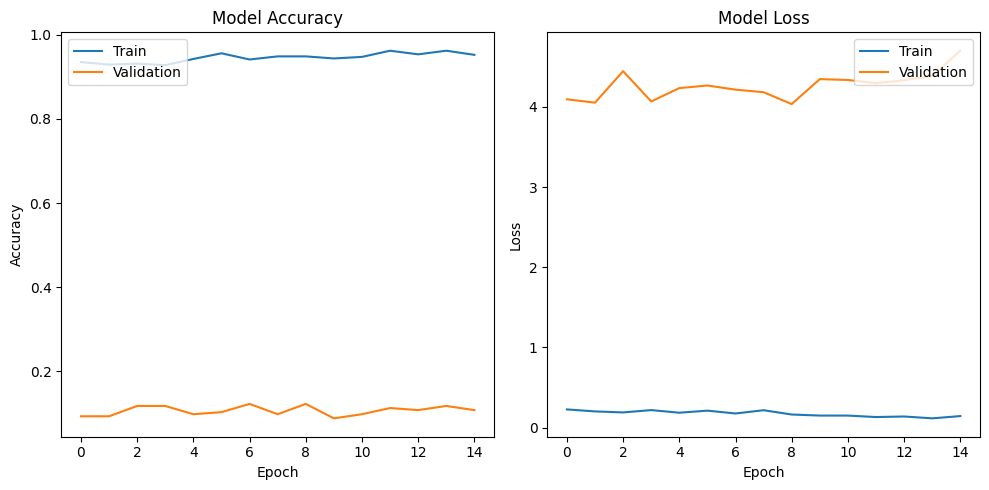

In [45]:
# Plotting model accuracy and loss
def plot_history(history):
    plt.figure(figsize=(10, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)